# Flood Adaptation: Minimal Model

This python script outlines a basic Agent-Based Model (ABM) developed using the Mesa framework, designed as a simplified representation of household adaptation to flood events in a social network context. The model serves as a template for understanding the fundamental mechanics of flood adapdtation with a given social network.

This directory is structured as follows:
 - A Mesa Agent class `Households` is defined in `agents.py`
 - A Mesa Agent class `Government` is defined in `agents.py` (this agent currently does not perform any action)
 - A Mesa Model class `AdaptationModel` is defined in `model.py`
 - This notebook `demo.ipynb` provides a demonstration of the model and its visualization.

Each household agent in the model represents a household with attributes and behaviors that determine its response to flood events. The flood depth attribute assigned to each household is currently random for demonstration purposes. The decision by each household to adapt is also arbitrary. In a more comprehensive model, this could be replaced with more sophisticated decision-making algorithms.

The current implementation includes several simplifications and arbitrary choices, such as random flood depths and basic adaptation logic based on random thresholds. These aspects are designed for clarity and ease of understanding and should be replaced with realistic and sound choices.

You are encouraged to modify, expand, and customize the model. This might include integrating real-world data, implementing more complex decision-making processes for agents, or exploring different network topologies and their effects on social dynamics.

The visualisation provided is basic. Additional aspects can be added for visualization and more in-depth analysis.

_This notebook was tested on 2023-11-13 with Mesa version 2.1.4 on Python 3.12.0._

# Running the model and visualizing the model domain and social network over time

c:\Users\stijn\AppData\Local\Programs\Python\Python312\Lib\site-packages\mesa\time.py:80: FutureWarning: The AgentSet is experimental. It may be changed or removed in any and all future releases, including patch releases.
We would love to hear what you think about this new feature. If you have any thoughts, share them with us here: https://github.com/projectmesa/mesa/discussions/1919
  self._agents: AgentSet = AgentSet(agents, model)


Agent 0 has friends [1, 2, 48, 46]
Agent 1 has friends [0, 49, 37, 9]
Agent 2 has friends [0, 4, 41, 45]
Agent 3 has friends [5, 19]
Agent 4 has friends [5, 2, 6]
Agent 5 has friends [4, 3, 7, 29, 9]
Agent 6 has friends [7, 4, 8, 13]
Agent 7 has friends [6, 8, 5, 9]
Agent 8 has friends [7, 6, 10, 25, 20, 27]
Agent 9 has friends [7, 11, 5, 13, 39, 1]
Agent 10 has friends [11, 8, 12, 25, 38]
Agent 11 has friends [10, 12, 9, 34, 35]
Agent 12 has friends [11, 13, 10, 14]
Agent 13 has friends [12, 9, 6, 16]
Agent 14 has friends [15, 12, 16, 18]
Agent 15 has friends [14, 16, 21]
Agent 16 has friends [15, 17, 14, 47, 13]
Agent 17 has friends [16, 18, 19]
Agent 18 has friends [17, 20, 14]
Agent 19 has friends [17, 21, 3, 40]
Agent 20 has friends [18, 22, 8]
Agent 21 has friends [22, 19, 23, 15]
Agent 22 has friends [21, 23, 20, 24, 44]
Agent 23 has friends [22, 24, 21, 25, 28, 49]
Agent 24 has friends [23, 25, 22, 26]
Agent 25 has friends [24, 23, 27, 8, 10]
Agent 26 has friends [27, 24, 28, 3

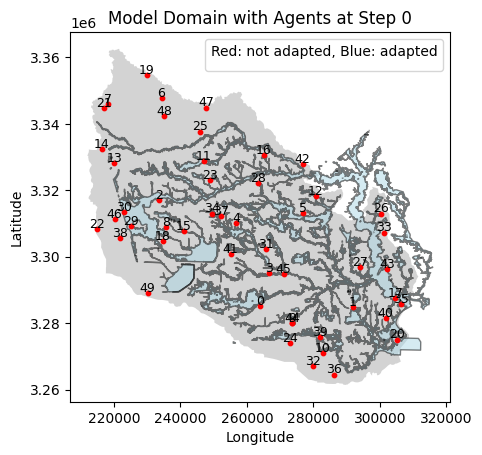

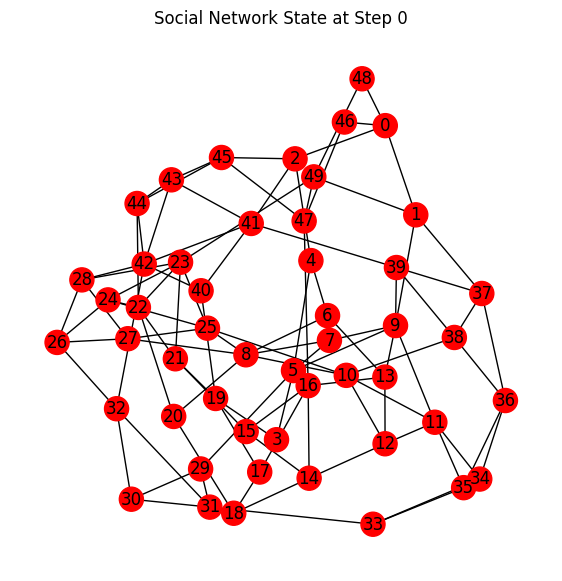


At step: 1 agent 0 has belief: 0.6931912464385998
Friend 1 has belief 0.5831761741472886
Friend 2 has belief 0
Friend 48 has belief 0
Friend 46 has belief 0.3899012041155846

At step: 1 agent 1 has belief: 0.60238972212085
Friend 0 has belief 0.6931912464385998
Friend 49 has belief 0
Friend 37 has belief 0.6148524475863744
Friend 9 has belief 0.6078280173551893

At step: 1 agent 2 has belief: 0
Friend 0 has belief 0.6931912464385998
Friend 4 has belief 0.5127503012205592
Friend 41 has belief 0.549813577605206
Friend 45 has belief 0.9415922390771937

At step: 1 agent 3 has belief: 0.34945433613048366
Friend 5 has belief 0
Friend 19 has belief 0

At step: 1 agent 4 has belief: 0.5149033445848995
Friend 5 has belief 0
Friend 2 has belief 0
Friend 6 has belief 0.5170563879492398

At step: 1 agent 5 has belief: 0.0
Friend 4 has belief 0.5149033445848995
Friend 3 has belief 0.34945433613048366
Friend 7 has belief 0
Friend 29 has belief 0.39558317063027193
Friend 9 has belief 0.6078280173551

<Figure size 1000x600 with 0 Axes>

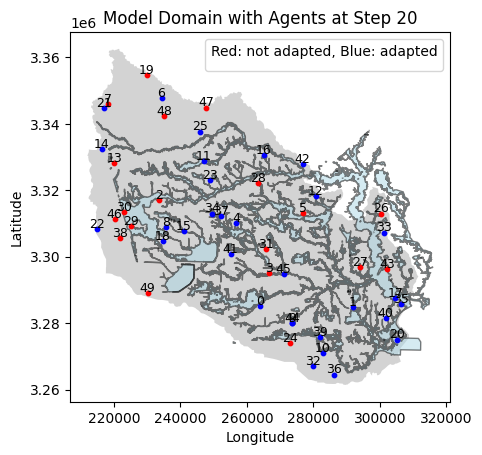

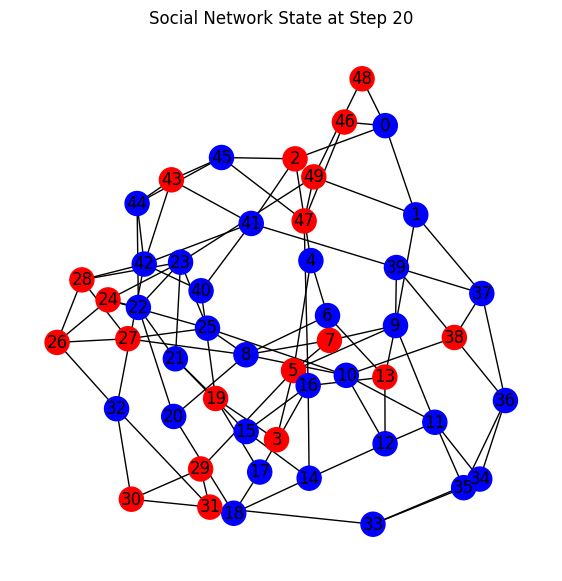

  0%|          | 0/1 [00:00<?, ?it/s]

Agent 0 has friends [2, 48, 31]
Agent 1 has friends [2, 3, 49, 20]
Agent 2 has friends [1, 3, 0, 9]
Agent 3 has friends [2, 4, 1, 19, 35]
Agent 4 has friends [3, 6, 16, 20, 33, 37]
Agent 5 has friends [6, 33, 18]
Agent 6 has friends [5, 7, 4, 8, 46]
Agent 7 has friends [6, 18, 22, 14]
Agent 8 has friends [9, 6, 23, 37, 28]
Agent 9 has friends [8, 11, 15, 2, 10, 22]
Agent 10 has friends [40, 9]
Agent 11 has friends [12, 9, 25]
Agent 12 has friends [11, 14, 35, 32]
Agent 13 has friends [14, 15]
Agent 14 has friends [13, 15, 12, 27, 7]
Agent 15 has friends [14, 13, 17, 9, 25]
Agent 16 has friends [18, 4, 22]
Agent 17 has friends [18, 15, 19, 21]
Agent 18 has friends [17, 19, 16, 7, 5, 36]
Agent 19 has friends [18, 17, 21, 41, 3, 45]
Agent 20 has friends [4, 1]
Agent 21 has friends [19, 23, 17]
Agent 22 has friends [23, 16, 7, 9]
Agent 23 has friends [22, 21, 25, 8]
Agent 24 has friends [25, 26]
Agent 25 has friends [24, 26, 23, 27, 15, 47, 11]
Agent 26 has friends [25, 27, 24, 28, 33]
Age

,RunId,iteration,Step,total_adapted_households,AgentID,FloodDamageEstimated,IsAdapted,FriendsCount,belief,Stubornness,Friends
0,0,0,0,0,0,0.478105,False,3,0.478105,1.5,None
1,0,0,0,0,1,0.354951,False,4,0.354951,1.0,None
2,0,0,0,0,2,0.000000,False,4,0.000000,0.5,None
3,0,0,0,0,3,0.517455,False,5,0.517455,1.0,None
4,0,0,0,0,4,1.000000,False,6,1.000000,1.5,None


In [1]:
from model import AdaptationModel
import matplotlib.pyplot as plt
import networkx as nx
from mesa import batch_run
import pandas as pd 
import seaborn as sns
import random
#from mesa.batchrunner import batch_run


# Initialize the Adaptation Model with 50 household agents.
model = AdaptationModel(number_of_households = 50, flood_map_choice="harvey", network="watts_strogatz") # flood_map_choice can be "harvey", "100yr", or "500yr"

# Calculate positions of nodes for the network plot.
# The spring_layout function positions nodes using a force-directed algorithm,
# which helps visualize the structure of the social network.
pos = nx.spring_layout(model.G)

# Define a function to plot agents on the network.
# This function takes a matplotlib axes object and the model as inputs.
def plot_network(ax, model):
    # Clear the current axes.
    ax.clear()
    # Determine the color of each node (agent) based on their adaptation status.
    colors = ['blue' if agent.is_adapted else 'red' for agent in model.schedule.agents]
    # Draw the network with node colors and labels.
    nx.draw(model.G, pos, node_color=colors, with_labels=True, ax=ax)
    # Set the title of the plot with the current step number.
    ax.set_title(f"Social Network State at Step {model.schedule.steps}", fontsize=12)

# Generate the initial plots at step 0.
# Plot the spatial distribution of agents. This is a function written in the model.py
model.plot_model_domain_with_agents()

# Plot the initial state of the social network.
fig, ax = plt.subplots(figsize=(7, 7))
plot_network(ax, model)
plt.show()

# Run the model for 20 steps and generate plots every 5 steps.
for step in range(20):
    model.step()

    # Every 5 steps, generate and display plots for both the spatial distribution and network.
    # Note the first step is step 0, so the plots will be generated at steps 4, 9, 14, and 19, which are the 5th, 10th, 15th, and 20th steps.
    if (step + 1) % 20 == 0:
        # Plot for the spatial map showing agent locations and adaptation status.
        plt.figure(figsize=(10, 6))
        model.plot_model_domain_with_agents()

        # Plot for the social network showing connections and adaptation statuses.
        fig, ax = plt.subplots(figsize=(7, 7))
        plot_network(ax, model)
        plt.show()

params = {
    #"number_of_households": [25, 50, 100], 
    #"stubbornness" : [random.choice([0.5,1,1.5,2]),1, 10, 15,30],
    #"threshold" : [0.1, 0.2, 0.5, 0.8]    
    
    }

results = batch_run(
    AdaptationModel,
    parameters=params,
    iterations=1,
    max_steps=20,
    number_processes=1,
    data_collection_period=1,  # Important, otherwise the datacollector will only collect data of the last time step
    display_progress=True,)

results_df = pd.DataFrame(results)
print(f"Column names in the dataframe: {results_df.columns.tolist()}")
results_df.head()




              FloodDamageEstimated  IsAdapted  FriendsCount    belief  \
Step AgentID                                                            
0    0                    0.693191      False             4  0.693191   
     1                    0.583176      False             4  0.583176   
     2                    0.000000      False             4  0.000000   
     3                    0.349454      False             2  0.349454   
     4                    0.512750      False             3  0.512750   

              Stubornness Friends  
Step AgentID                       
0    0                1.0    None  
     1                1.5    None  
     2                1.0    None  
     3                2.0    None  
     4                1.0    None  
Average belief at the start is: 0.46020215718425556
Standard deviation of belief at the first step: 0.30091371647365556
Average belief at the end is: 0.44810920493540474
Standard deviation of belief at the last step: 0.28799853947405973

[Text(0.5, 0, 'Step'),
 Text(0, 0.5, "Agent's belief"),
 Text(0.5, 1.0, "Agents' belief through time")]

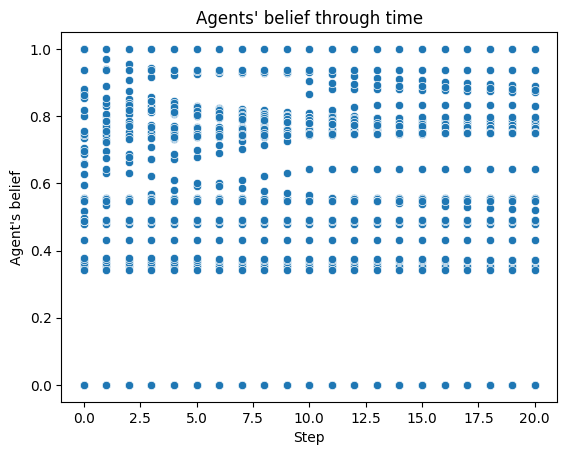

In [2]:
agent_data = model.datacollector.get_agent_vars_dataframe() 
##print("Collected Data at Step {}: {}".format(step, agent_data))
print(agent_data.head())
agent_data
agent_data.to_excel(r"C:\Users\stijn\Downloads\Data export test.xlsx", index=True, engine = 'openpyxl')  # Set index to True if you want to include the index
#agent_data.to_csv('path_to_file.csv', index=True)  # Set index to True if you want to include the index


agent_data.reset_index(inplace=True)
last_step_data = agent_data.groupby('AgentID').last()
first_step_data = agent_data.groupby('AgentID').first()
first_step_beliefs = first_step_data['belief']
last_step_beliefs = last_step_data['belief']
belief_difference = last_step_beliefs - first_step_beliefs

average_belief_first_step = first_step_beliefs.mean()
print("Average belief at the start is:", average_belief_first_step)
# Calculate the standard deviation of belief at the first step
std_dev_belief_first_step = first_step_beliefs.std()
print(f"Standard deviation of belief at the first step: {std_dev_belief_first_step}")
average_belief_last_step = last_step_beliefs.mean()
print("Average belief at the end is:", average_belief_last_step)
# Calculate the standard deviation of belief at the last step
std_dev_belief_last_step = last_step_beliefs.std()
print(f"Standard deviation of belief at the last step: {std_dev_belief_last_step}")
print("")

print(belief_difference)

g = sns.scatterplot(data=results_df, x="Step", y="belief")
g.set(
    xlabel="Step",
    ylabel="Agent's belief",
    title="Agents' belief through time"
)



In [3]:
model_data = model.datacollector.get_model_vars_dataframe()
model_data

,total_adapted_households
0,0
1,26
2,26
3,26
4,27
5,27
6,29
7,30
8,30
9,30
